Öncelikle gerekli kütüphaneler eklenmelidir:

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA

Ardından veri seti okunur:

In [2]:
data = pd.read_csv("C:\\Users\\beyza\\OneDrive\\Masaüstü\\VeriBilimi\\dava.csv")

Kümeleme için uygun özellikler seçilir, otomatik olarak optimal küme sayısı belirlenir ve bu grafikle görselleştirilir:

Optimal küme sayısı: 6


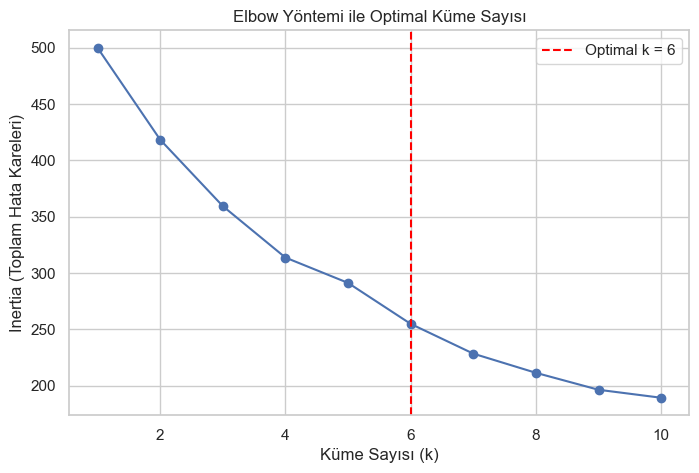

In [3]:
sns.set_theme(style="whitegrid")
features = ['Case Duration (Days)', 'Number of Witnesses',
            'Legal Fees (USD)', 'Number of Evidence Items', 'Severity']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

knee = KneeLocator(list(K_range), inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee if knee.knee is not None else 3
print(f"Optimal küme sayısı: {optimal_k}")

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Toplam Hata Kareleri)")
plt.legend()
plt.show()

KneeLocator otomatik olarak optimal küme sayısını 6 belirlemiştir.

K-means ile veri kümelere ayrılır ve özelliklerin kümelere dağılımı(sayıları ve ortalamaları) yazdırılıp box-plot ile görselleştirilir:


Kümelere göre ortalama değerler:
         Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
Cluster                                                                
0                  193.555556            16.222222      24701.944444   
1                  237.312500             2.250000      12100.187500   
2                  140.842105             9.000000      25228.315789   
3                   84.285714             6.500000      35300.714286   
4                  269.066667             6.200000      42894.866667   
5                  269.333333            10.833333      21554.166667   

         Number of Evidence Items  Severity  
Cluster                                      
0                       38.277778  1.777778  
1                       31.062500  2.000000  
2                       16.894737  2.684211  
3                       22.214286  1.428571  
4                       37.600000  1.800000  
5                       14.222222  1.166667  

Küme dağılımı :
Clus

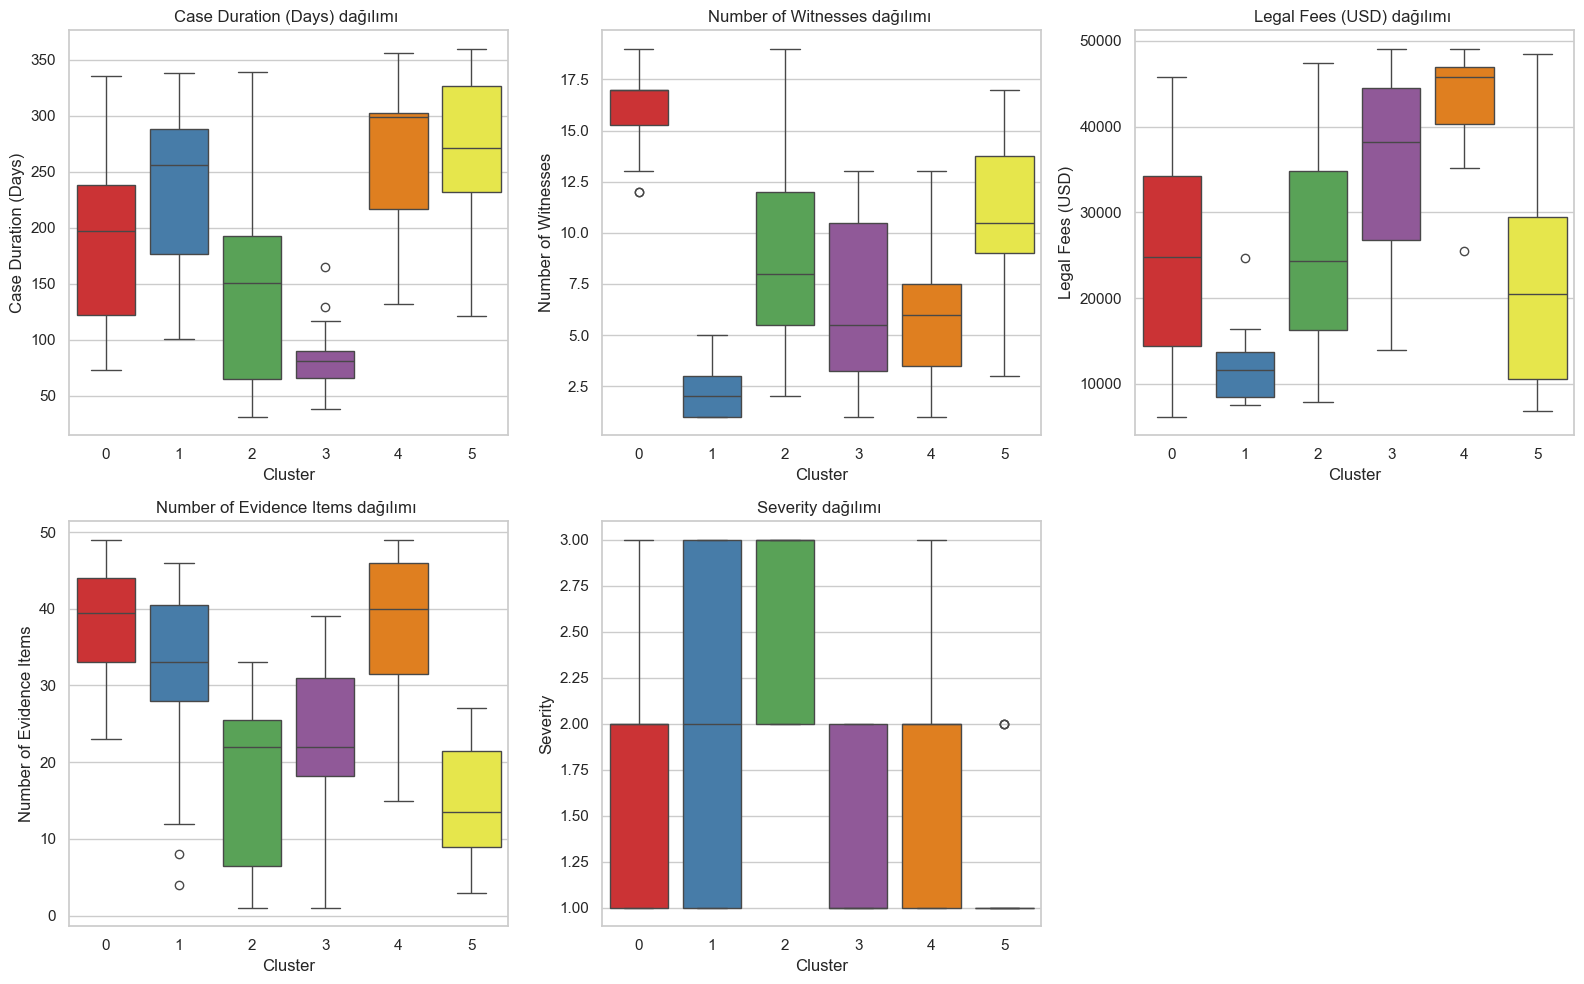

In [4]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = data.groupby('Cluster')[features].mean()
print("\nKümelere göre ortalama değerler:")
print(cluster_summary)

print("\nKüme dağılımı :")
print(data['Cluster'].value_counts())

plt.figure(figsize=(16,10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=data, palette='Set1', dodge=False, legend=False)
    plt.title(f"{feature} dağılımı ")
plt.tight_layout()
plt.show()

Sonuçlar görselleştirilince fark edilebileceği üzere kümeleri genel bir mantığa oturtabiliriz. Örneğin 0 numaralı(Kırmızı) küme daha uzun süren,fazla tanığı olan, pahalı ve yüksek kanıtlı davaları içerir. 1 numaralı(Mavi) küme uzun süren, tanık ve ücret sayısı az ancak şiddeti yüksek davaları kapsar. 2 numaralı(yeşil) küme genel olarak özelliklerde ortalamadadır. 3 numaralı(Mor) küme ücret dışındaki özelliklerin hepsinde düşük değer almıştır. 4 numaralı(turuncu) küme tanık sayısı dışında yüksek değerlere sahiptir. 5 numaralı(sarı) küme şiddeti düşük davalara bakar ancak 1 aykırı değere sahiptir.

Verinin PCA ile 2 boyuta indirgenerek kümelerin gösterilmesi:

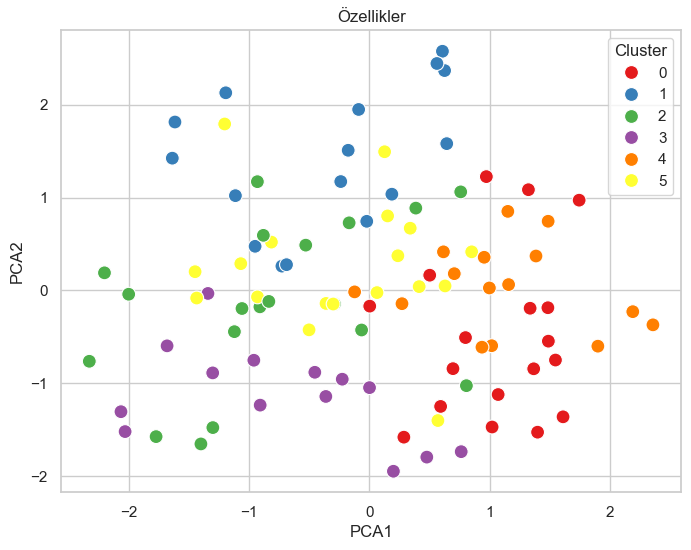

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:,0]
data['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1', s=100)
plt.title("Özellikler")
plt.show()

Grafikten görülebileceği üzere 1 numaralı küme diğerlerinden daha ayrı gözükmekte, bu da kümenin özellikler açısından iyi tanımlandığını gösterir. Merkezde yoğunluk oluşmuştur bu da verinin burada çok da ayrıştırıcı olmadığını gösterir. Bazı kümeler daha küçük ve seyrek iken diğerlerinde daha fazla bir yayılım gözlemlenebilir.